# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques like regularization that are used to avoid overfitting (but haven't practiced this yet). In this lesson we'll discuss a fundamental method for avoid overfitting that is commonly referred to a the _train/test split_. 

The idea is very similar to something called "cross-validation" (indeed it is a type of cross-validation) in that we split the dataset into two subsets:
* a subset to train our model on, and
* a subset to test our model's predictions on

This serves two useful purposes:
* We prevent overfitting by not using all the data, and
* We have some remaining data to evaluate our model.

While it may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed 80% of data from California and 20% elsewhere and is sorted by state. If we split our data into 80% training data and 20% testing data we ight inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them. holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Demo
Let's explore test-training split with some sample datasets.

In [32]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

# Load the Boston Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target
# Take a look at the data again
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
df.age.mean()

-3.6342849293088766e-16

Scikit-learn has a nice function to split a dataset for testing and training called `train_test_split`. The `test_size` keyword argument indicates the proportion of the data that should be held over for testing.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(265, 10) (265,)
(177, 10) (177,)


Now we fit a model on the training data and test on the testing data.

Score: 0.471195535918


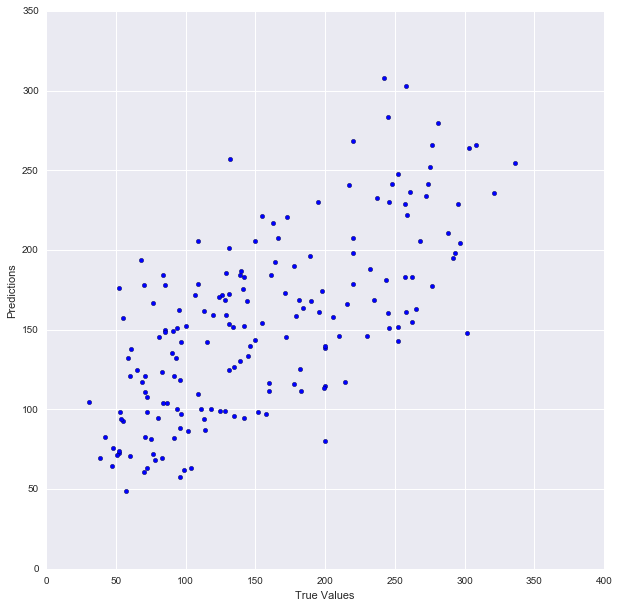

In [7]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)     

Note that we could always split the data up manually. Here's an example for [this dataset](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) of a manual splitting.

Now let's try out k-fold cross-validation. Again scikit-learn provides useful functions to do the heavy lifting. The function `cross_val_predict` returns the predicted values for each data point when it's in the testing slice.

Cross-validated scores: [ 0.4554861   0.46138572  0.40094084  0.55220736  0.43942775  0.56923406]
Cross-Predicted Accuracy: 0.490806583864


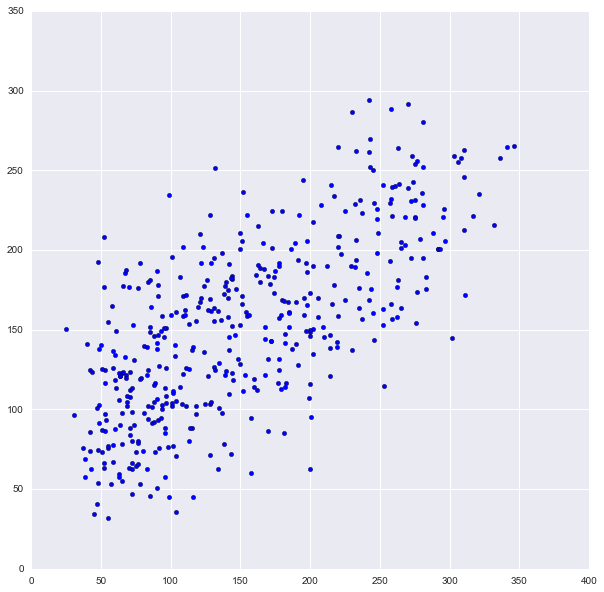

In [8]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print "Cross-validated scores:", scores

# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

# Guided Practice

Use what you've learned to train and test models on the Boston housing data set. If you need a few hints take a look at [this example](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html) but try your best to make it happen first. Complete the following tasks:
* Fit a linear model to the Boston Housing data using all the available variables. Perform test training splits of 50:50, 70:30, and 90:10, comparing the scores on test data.
* For the same setup, perform a $k$-fold cross validation with $k=5$ slices (with cross-validated predictions)

In [93]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict as CVP, train_test_split as tts, cross_val_score as CVS
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target


In [101]:
temp = datasets.load_boston()
type(temp)
print temp.keys()
#print temp.data # bunch of data, no headings
print temp.feature_names # only headings
print temp.DESCR # data dictionary

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility 

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

### Here's what we will be doing:

* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Folds**

* Try a few different splits of the data for the same models.
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?

Try a variety of response variables.  Start with **MEDV** / .target attribute from the dataset load method.

### 1. Clean up any data
Load the Boston housing data.  Fix any problems, if applicable.

In [49]:
print boston.keys()
print len(y)
df = pd.DataFrame(boston.data, columns = boston.feature_names)
print df.shape
print df.head(3)
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)

['data', 'feature_names', 'DESCR', 'target']
506
(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [50]:
print df.loc[:,['RM','AGE','TAX','CRIM']].shape
print y.shape

(506, 4)
(506,)


## Using Sklearn Linear Regression

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on
Score and plot your predictions.

<class 'pandas.core.frame.DataFrame'>
0.624255341065


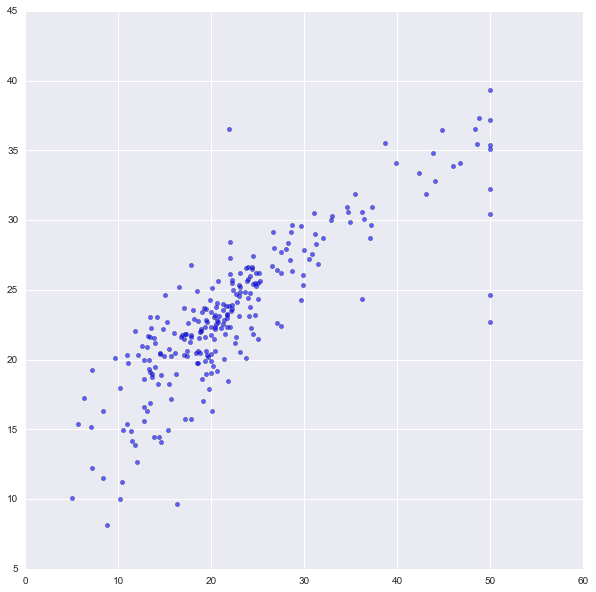

In [76]:
# RM, AGE, TAX, CRIM
fields = ['RM','AGE','TAX','CRIM']
input_df = df.loc[:,['RM','AGE','TAX','CRIM']]
print type(input_df)
X_train, X_test, y_train, y_test = tts(input_df, y, test_size = 0.5)

#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
#print X_train.shape, X_test.shape, y_train.shape, y_test.shape
def score_my_stuff(x, color):
    X_train, X_test, y_train, y_test = tts(input_df, y, test_size = x)
    model = lm.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    score = model.score(X_test,y_test)
    plt.scatter(y_test, y_hat, c=color, alpha = 0.6)
    print score

score_my_stuff(.5, 'Blue')


### 3. Try 70/30 and 90/10
Score and plot.  How do your metrics change?

0.580634701598
0.455184277785


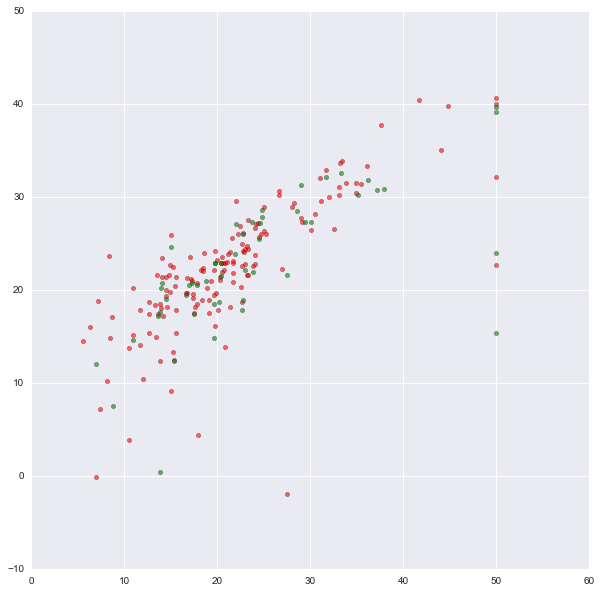

In [78]:
score_my_stuff(.3,'Red')
score_my_stuff(.1,'Green')

## Using Statsmodels OLS

### 4. Try the previous splits, using statsmodels.

0.5 0.924509272635
0.3 0.930762662223
0.1 0.936156132994


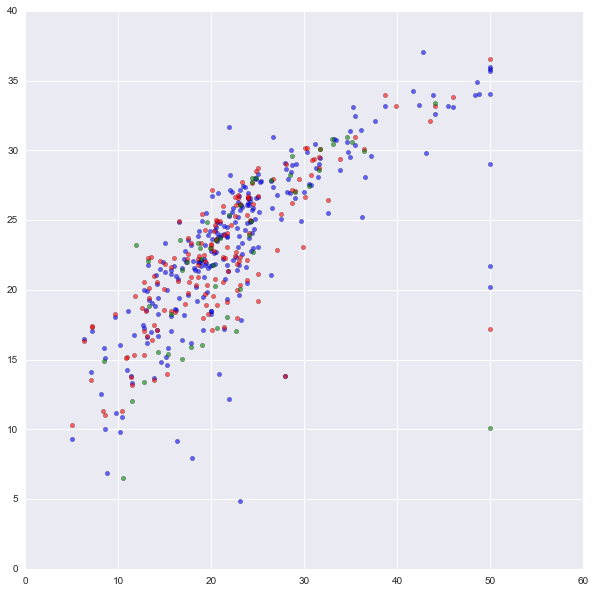

In [84]:
import statsmodels.api as sm



def score_my_stuff_STATS(x, color):
    X_train, X_test, y_train, y_test = tts(input_df, y, test_size = x)
    #model = lm.fit(X_train, y_train)
    #y_hat = model.predict(X_test)
    model2 = sm.OLS(y_train, X_train).fit()
    y_hat = model2.predict(X_test)
    score = model2.rsquared
    plt.scatter(y_test, y_hat, c=color, alpha = 0.6)
    print x, score
    
score_my_stuff_STATS(.5,'Blue')
score_my_stuff_STATS(.3,'Red')
score_my_stuff_STATS(.1,'Green')

## Back to Sklearn

### 5. Try K-Folds between 5-10 for your regression. 
What seems optimal?  How do your scores change?  What the variance like?  Try different folds to get a sense of how this impacts your score.

In [103]:
for i in ([5,6,7,8,9,10]):
    scores = CVS(lm,input_df,y, cv = i)
    print i,  np.mean(scores) #, scores

5 0.119924590649
6 0.197238291926
7 0.262199048075
8 -0.00278935452812
9 0.115036657321
10 -0.0190255897769


## Using Statsmodels Formula

Adapt the formula example using your metrics.  We will review the implementation in class.  Here is a reference to consider.  The workflow is the same, but the syntax is a little different.  We want to get accustomed to the formula syntax because we will be using them a lot more with regressions.  The results should be comparable to Sklearn's regression models.


https://ga-students.slack.com/files/david.yerrington/F1ZDW139S/statsmodels_formula.py

In [120]:
import statsmodels.formula.api as smf

boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target

model = smf.ols(data=df, formula="MEDV ~ LSTAT + ZN + RM + DIS + TAX").fit()



## Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test / train split, or K-Folds.

In [145]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
print df.shape

print boston.feature_names
ft_list = boston.feature_names


from itertools import permutations as perm

#print list(map("".join, perm('1234')))



def score_my_stuff3(k,feature_name):
    input_df = df[[feature_name]]
    return np.mean(CVS(lm,input_df,df['MEDV'], cv = 6)), np.std(CVS(lm,input_df,df['MEDV'], cv = 6))

for x in ft_list:
    mean_score, std_score = score_my_stuff3(6,x)
    print x,'\t\t', mean_score, std_score


input_df = df[['CHAS','DIS','CRIM','ZN','LSTAT']]
print np.mean(CVS(lm,input_df,df['MEDV'], cv = 6)), np.std(CVS(lm,input_df,df['MEDV'], cv = 6))

df.corr()

(506, 14)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
CRIM 		-0.584995711644 0.441180502166
ZN 		-0.392882901136 0.480053790758
INDUS 		-0.23000184931 0.225048082912
CHAS 		-0.648631408393 0.756637503183
NOX 		-0.316376813025 0.239142246567
RM 		0.043932461491 0.912124024151
AGE 		-0.358772328901 0.371637088949
DIS 		-0.551198948243 0.50714854138
RAD 		-0.330123935607 0.240345757994
TAX 		-0.201642062279 0.311345815709
PTRATIO 		-0.138175118769 0.24276075032
B 		-0.338674767553 0.286332316848
LSTAT 		0.295562079622 0.148532023406
0.313648649521 0.170152902383


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Bonus Challenge #2:

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

_Tip: Check out pairplots, coefficients, and pearson scores._